# **Lab-1 : Logistic Regression**
---



**Submitted by:** Ankit Majhi  
**Roll No:** ACE079BCT009

---



## **Objective**

1. Logistic Regression Using Single Feature  
2. Logistic Regression Using Multiple Features


## **Background**

**Artificial Intelligence (AI):**

+ A broad field focused on creating systems that can perform tasks requiring human-like intelligence, such as learning, reasoning, and decision-making.

**Machine Learning (ML):**

+ The system learns from data and finds patterns instead of being fully hard-coded.

**Deep Learning (DL):**

+ A subset of ML that uses multi-layer neural networks to model complex patterns, commonly applied in image, speech, and text processing.

**Data Science:**

+ The broader process that involves collecting, cleaning, exploring, visualizing, and modeling data to extract meaningful insights and support decision-making.

## **Task 1: Logistic Regression with a Single Feature**

### 1. Data Retrieval and Collection

In [2]:
import pandas as pd

data = pd.read_csv("Heart_Disease_Prediction.csv")

data.shape, data.columns


((270, 14),
 Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
        'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
        'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
       dtype='str'))

### 2. Data Cleaning

In [3]:
# checking for missing values
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [4]:

#remove invalid values <=0
data = data[data["Cholesterol"] > 0]

In [5]:
print(data["Heart Disease"].unique())
#target value is binary or not

<StringArray>
['Presence', 'Absence']
Length: 2, dtype: str


In [6]:
# Convert target variable to binary numeric form
data["Heart Disease"] = data["Heart Disease"].map({
    "Absence": 0,
    "Presence": 1
})


In [7]:
print(data["Heart Disease"].unique())
#target value is binary or not

[1 0]


In [8]:
data.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int64
dtype: object

### 3. Feature Design


In [9]:
X = data[["Cholesterol"]]  # Feature (input)
y = data["Heart Disease"]  # Target (output)


Cholestrol is used as a feature because it is a strongly associated factor with cardiovascular diseases.

### 4. Algorithm Selection

Logistic Regression is chosen because it is designed for binary classification. It is easy to intrepret and the outputs probabilities are between 0 and 1.

### 5. Loss Function Selection
Binary Cross-Entropy (Log Loss)

L=−[ylog(p)+(1−y)log(1−p)]

Penalizes confident but incorrect predictions and is ideal for probabilistic classifiers.

### 6. Model Learning(Training)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model_single = LogisticRegression()
model_single.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### 7. Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model_single.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))




Accuracy : 0.6111111111111112
Precision: 0.5
Recall   : 0.23809523809523808
F1-score : 0.3225806451612903


In [12]:
confusion_matrix(y_test, y_pred)

array([[28,  5],
       [16,  5]])

Interpretation

Accuracy: Overall correctness

Precision: How many predicted positives are correct

Recall: Ability to detect heart disease

F1-score: Balance between precision and recall

### Sigmoid Curve


c:\Users\blood\Desktop\AI-LAB\lab_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


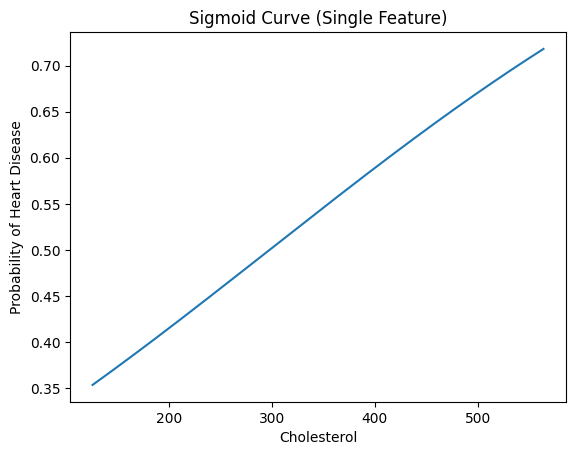

In [13]:
import numpy as np
import matplotlib.pyplot as plt

X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = model_single.predict_proba(X_range)[:, 1]

plt.plot(X_range, y_prob)
plt.xlabel("Cholesterol")
plt.ylabel("Probability of Heart Disease")
plt.title("Sigmoid Curve (Single Feature)")
plt.show()


## **Task 2: Logistic Regression Using Multiple Features**

Data retrieval,collection and cleaning are already done (same as task 1).

### 3. Feature Design

In [14]:

# Features and target
X_multi = data.drop("Heart Disease", axis=1)
y = data["Heart Disease"]

In [15]:
#Encoding & Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_multi_scaled = scaler.fit_transform(X_multi)

Multiple features are needed because:

Heart disease depends on multiple medical factors.

Multiple features capture complex relationships and improves predictive power.

### 4. Algorithm Selection

Logistic Regression still suitable:

Works well with multiple features

Interpretable coefficients

### 5. Loss Function

Binary Cross-Entropy (Log Loss)

L=−[ylog(p)+(1−y)log(1−p)]

### 6. Model Learning

In [16]:

X_train, X_test, y_train, y_test = train_test_split(
    X_multi_scaled, y, test_size=0.2, random_state=42
)

model_multi = LogisticRegression(max_iter=1000)
model_multi.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### 7. Model Evaluation

In [17]:

y_pred_multi = model_multi.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_multi))
print("Precision:", precision_score(y_test, y_pred_multi))
print("Recall:", recall_score(y_test, y_pred_multi))
print("F1 Score:", f1_score(y_test, y_pred_multi))



Accuracy: 0.9074074074074074
Precision: 0.9
Recall: 0.8571428571428571
F1 Score: 0.8780487804878049


In [18]:
confusion_matrix(y_test, y_pred_multi)

array([[31,  2],
       [ 3, 18]])

### Model Comparision

Logistic regression predicts probabilities.

Single-feature models are interpretable but limited with lower accuracy.

Multi-feature models capture real-world complexity with higher accuracy and improved recalling features.

## **DISCUSSION AND CONCLUSION**
In this lab, we studied how to build a Machine Learning pipeline using logistic regression. We started with a breast cancer dataset to understand the basics and then moved on to a heart disease dataset. The main goal was to see how well we could predict if a patient has heart disease by following the standard ML steps: collecting data, cleaning it (like removing invalid cholesterol values), choosing features, and training the model.We tested two different models. The first one was a single-feature model that only used cholesterol levels to make predictions. We chose cholesterol because it's a known risk factor, but it didn't work very well on its own. It ended up with a very low F1-score of 0.32 and a recall of 24%. In a real hospital, this would be dangerous because it would miss 16 out of 21 sick patients, which is a huge risk.The second model used multiple features like age, blood pressure, and max heart rate. This model was much better because it could see the more complex patterns in the data. Its F1-score jumped to 0.88 and its recall hit 86%. This time, the model only missed 3 patients instead of 16. It also had a high precision of 90%, meaning it didn't cause many false alarms.

Overall, this lab showed that while single-feature models are easy to understand, they aren't accurate enough for something as important as healthcare. Using multiple features makes the model much more reliable. Even though the multi-feature model is more complex, its ability to save lives by not missing cases makes it the better choice for clinical use.